**First import the required packages**

In [237]:
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

**Load the data from csv**

In [238]:
dataSet = pandas.read_csv("DecisionTree-CSV.csv")
print(dataSet)

    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES


**Convert non-numerical fields to numerical values**

In [239]:
convert1 = {'UK': 0, 'USA': 1, 'N': 2}
convert2 = {'YES': 1, 'NO': 0}
dataSet['Nationality'] = dataSet['Nationality'].map(convert1)
dataSet['Go'] = dataSet['Go'].map(convert2)
print(dataSet)

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


**Tell it which fields are input and which is output**

In [240]:
features = ['Age', 'Experience', 'Rank', 'Nationality']

input = dataSet[features]
output = dataSet['Go']

print(input)
print(output)

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


**Now create the tree and train the model**

In [241]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(input, output)

**Now plot the tree into readable form.**
    <br> > The top label shows what feature it is splitting on, and the value it is splitting at
    <br> > The second label is the entropy value, 0.0 = all items got the same result, 0.5 = items were split 50/50
    <br> > The third label is the total number of items being looked at
    <br> > The bottom label is the result of the split, number of items that went each side

[Text(0.4, 0.9, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.2, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6, 0.7, 'Nationality <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.4, 0.5, 'Experience <= 9.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.3, 'Age <= 35.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

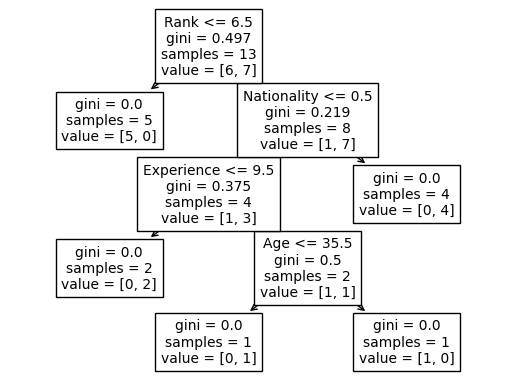

In [242]:
tree.plot_tree(dtree, feature_names=features)

**Set your prediction data, you can do it manually or use a dataframe to avoid user warnings**

In [ ]:
predictData = pandas.DataFrame(columns=features, index=[0])
predictData.loc[0] = pandas.Series({'Age': 40, 'Experience': 10, 'Rank': 8, 'Nationality': 1})

**Use the model to predict new things**

In [ ]:
outcome = dtree.predict(predictData)

**Show some nice text to show whats happening**

In [249]:
nationalityText =''
if predictData.loc[0,'Nationality'] == 0:
    nationalityText = 'UK'
elif predictData.loc[0,'Nationality'] == 1:
    nationalityText == 'USA'
elif predictData.loc[0,'Nationality'] == 2:
    nationalityText = 'N'

question = 'Should I attend a '+str(predictData.loc[0,'Age'])+' year old, '+str(predictData.loc[0,'Experience'])+ ' years experience, Rank '+str(predictData.loc[0,'Rank'])+' '+nationalityText+' comedian?: '
if outcome == 0:
    print (question+'\033[91m'+'\033[1m'+'No'+'\033[0m')
else: 
    print (question+'\033[92m'+'\033[1m'+'Yes'+'\033[0m')

Should I attend a 40 year old, 10 years experience, Rank 8  comedian?: Yes
